### Oppstart


In [1]:
import dhlab.graph_networkx_louvain as gnl
import dhlab.nbtext as nb
from dhlab.module_update import css
import networkx as nx
%matplotlib inline

In [2]:
css()

In [3]:
plot = lambda x, lw = 5: x.plot(figsize=(10,5), lw=lw)

In [4]:
import warnings
warnings.filterwarnings('ignore')

# N-gramdata

Data kan hentes fra [NB N-gram](https://www.nb.no/sp_tjenester/beta/ngram_1/trends#ngram/query?terms=demokrati%2C+diktatur&lang=all&case_sens=0&freq=rel&corpus=bok) med kommandoen `nb_ngram(<ord>, periode)`. Dataene utgjør en **dataramme** som kan analyseres og plottes

In [6]:
deadline = nb.nb_ngram('kratt', smooth=2, corpus='avis', years = (1950, 2013))

In [7]:
deadline[10:30]

,kratt
1960,0.000204
1961,0.000205
1962,0.000217
1963,0.000202
1964,0.000167
1965,0.000187
1966,0.000189
1967,0.000148
1968,0.000126
1969,0.000141


In [8]:
nb.nb_ngram('han, hun', smooth=1, years=(1950, 1990)).head(10)

,han,hun
1950,1.019108,0.355012
1951,1.026575,0.337322
1952,0.970808,0.340458
1953,0.951532,0.311137
1954,0.787041,0.281906
1955,0.753244,0.234209
1956,0.693097,0.212321
1957,0.672339,0.198300
1958,0.696554,0.213855
1959,0.876191,0.286295


## Plotting

Lag en figur med egendefinert (se over) kommando `plot(<ngram dataramme>)` eller bruk innebygd Python `<ngram>.plot(...)`

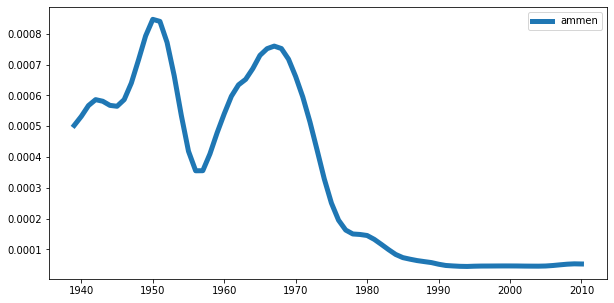

In [9]:
plot(nb.nb_ngram("ammen", smooth=10, years=(1930, 2010)));

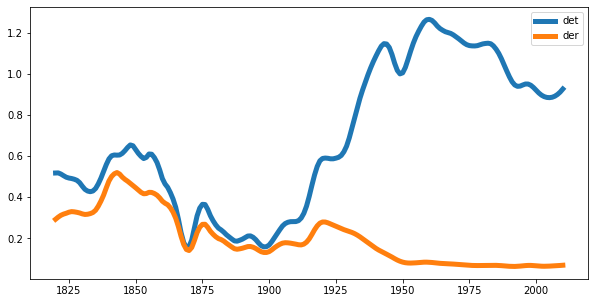

In [10]:
plot(nb.nb_ngram("det, der", smooth=10, corpus='avis', years=(1810, 2010)));

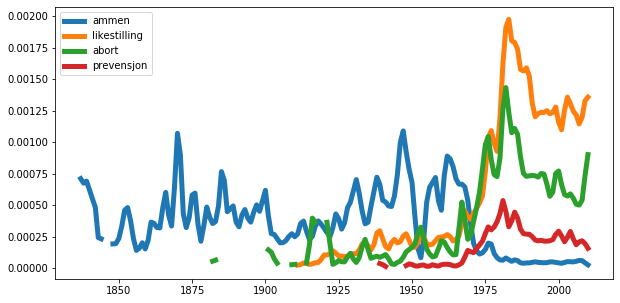

In [14]:
plot(nb.nb_ngram("ammen, likestilling, abort, prevensjon", smooth=3, years=(1830, 2010)).sort_index());

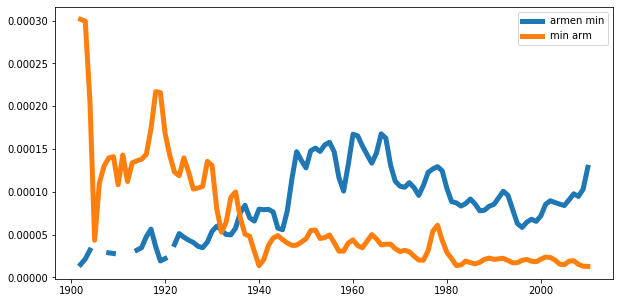

In [15]:
plot(nb.nb_ngram("armen min, min arm", smooth=3, years=(1900, 2010)).sort_index());

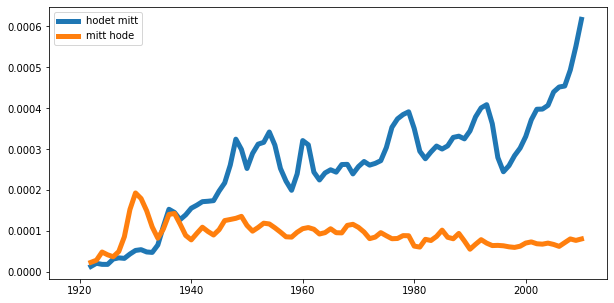

In [17]:
plot(nb.nb_ngram("hodet mitt, mitt hode", smooth=3, years=(1900, 2010)).sort_index());

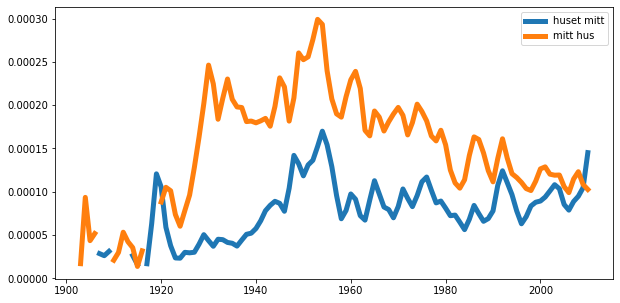

In [16]:
plot(nb.nb_ngram("huset mitt, mitt hus", smooth=3, years=(1900, 2010)).sort_index());

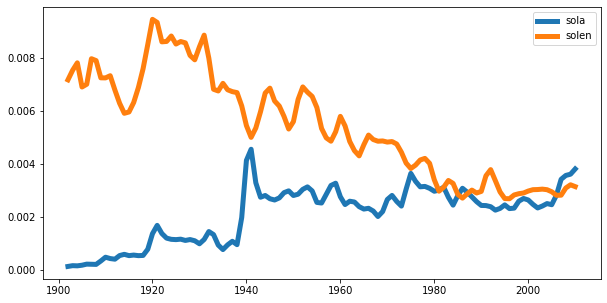

In [18]:
plot(nb.nb_ngram("sola, solen", smooth=3, years=(1900, 2010)));

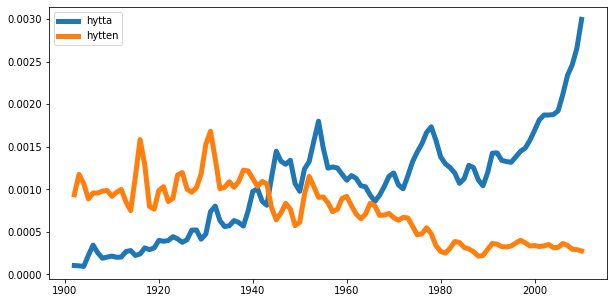

In [19]:
plot(nb.nb_ngram("hytta, hytten", smooth=3, years=(1900, 2010)));

In [ ]:
plot(nb.nb_ngram("ammen, likestilling", smooth=3, years=(1850, 2010)));

## N-gram med jokertegn

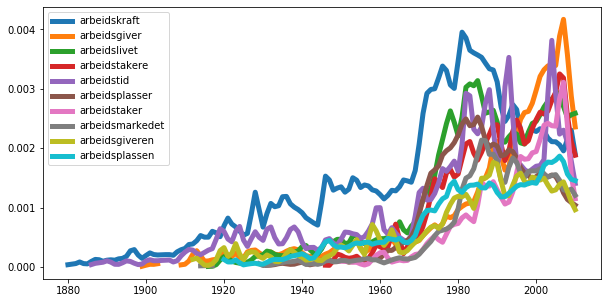

In [20]:
plot(nb.nb_ngram("arbeids*"));

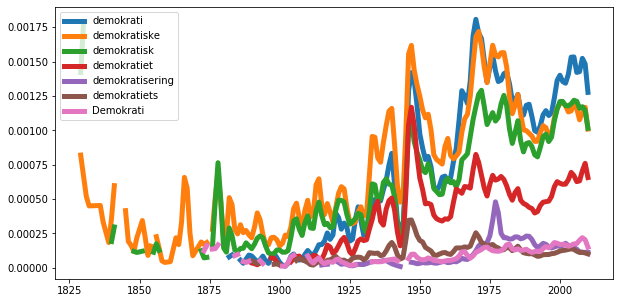

In [21]:
plot(nb.nb_ngram('demokrati*').sort_index());

# Galakser


Galaksene måler koblinger mellom ord, og kan brukes for å lage sett av ord til forskjellige formål, som for eksempel sentimentanalyse, eller stedsnavn.

For engelsk og tysk er grunnlagsmaterialet [Google n-gram](https://books.google.com/ngrams/graph?content=democracy&year_start=1800&year_end=2000&corpus=15&smoothing=3&share=&direct_url=t1%3B%2Cdemocracy%3B%2Cc0).

Kommanden er `make_graph(<ord>, lang=<språk-kode>)`

## Definer koblinger til *is*

I eksemplet ser vi på **is**, sjekk [Bokmålsordboka](https://ordbok.uib.no/perl/ordbok.cgi?OPP=is&ant_bokmaal=5&ant_nynorsk=5&begge=+&ordbok=begge) om ordet.

In [22]:
g_is = nb.make_graph('is', cutoff=12, lang='nob')

In [28]:
g_ice = nb.make_graph('ice', cutoff=12, lang='eng')

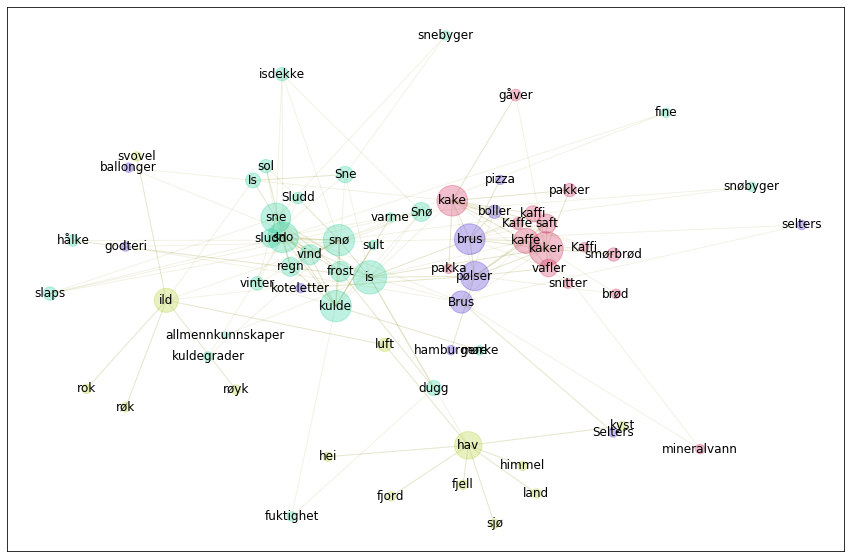

In [26]:
gnl.show_graph(g_is, spread=1.8, fontsize = 12)

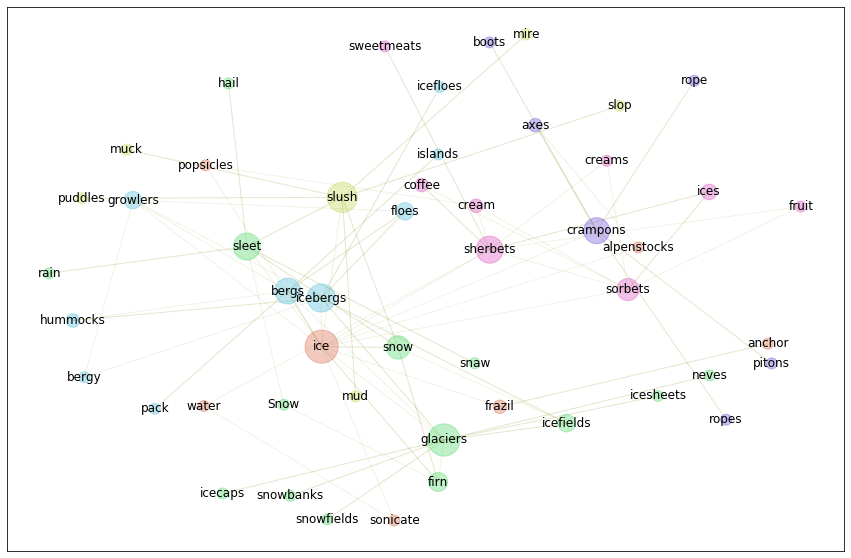

In [29]:
gnl.show_graph(g_ice, spread=1.8, fontsize = 12)

In [27]:
gnl.show_communities(g_is)

hav-ild :  hav, ild, luft, kyst, rok, hei, røyk, fjell, himmel, land, fjord, sjø, svovel, røk

is-kulde :  is, kulde, snø, sno, sne, frost, vind, sludd, Snø, regn, Sne, dugg, Is, isdekke, vinter, slaps, sol, Sludd, hålke, fuktighet, snøbyger, kuldegrader, fine, snebyger, sult, varme, mørke, allmennkunnskaper

brus-pølser :  brus, pølser, Brus, boller, ballonger, pizza, Selters, godteri, hamburgere, koteletter, selters

kaker-kake :  kaker, kake, kaffe, saft, vafler, kaffi, pakker, smørbrød, Kaffe, gåver, pakka, Kaffi, brød, snitter, mineralvann



In [30]:
gnl.show_communities(g_ice)

slush-muck :  slush, muck, mire, puddles, slop, mud

glaciers-sleet :  glaciers, sleet, snow, firn, icefields, snowbanks, snowfields, icecaps, icesheets, neves, rain, Snow, snaw, hail

icebergs-bergs :  icebergs, bergs, floes, growlers, hummocks, bergy, icefloes, pack, islands

crampons-axes :  crampons, axes, ropes, pitons, boots, rope

sherbets-sorbets :  sherbets, sorbets, ices, coffee, cream, creams, sweetmeats, fruit

ice-frazil :  ice, frazil, water, alpenstocks, sonicate, anchor, popsicles



# Hva med andre ord og betydningsvarianter?

In [ ]:
test = nb.make_graph('tog', cutoff=20)

In [ ]:
gnl.show_graph(test, spread=2)

In [ ]:
gnl.show_communities(test)